<b><big>Comparative Analysis on Supervised Machine Learning Classification Algorithms  (KNN)</big></b>

<h3><b>Task-A.1:</b> The Primary objective of this task is to implement a K-Nearest Neighbors (KNN) classifier model for predicting the stability of the Electrical Grids based on the 13 features and 1 binary class Label provided in the Electical Grid Stability Simulated Data from UCI Machine Learning repository. </h3>

<BR/>

<b>The analysis is performed for different sets of input values using the methodology similar to that described in [SchÃ¤fer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.].  </b>
<h4>Supervised Machine Learning involves the following steps in general</h4>
    <ul>
       <li>Data Preprocessing(Data Cleaning,Encoding, Outlier detection),</li>
       <li>Exploratory Data Analysis(EDA), </li>
       <li>Features Selection, </li>
       <li>Training by performing GridSearch CrossValidation with hyperparameters to find the best model,</li>
       <li>Predicting the best model, </li>
       <li>Evaluating the performance using the accuracy, Confusion matrix values - precision, recall,
             </li>
       <li>Classification Report,
    Area Under ROC Curve(AUROC) and </li>
       <li>Sample test</li>

       Dataset URL: [Electrical Grid](https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data)
   

In [ ]:
pip install scikit-learn

In [ ]:
pip install imbalanced-learn

<h4><b>Importing Required Packages</b></h4>

In [ ]:
#Installed the scikit-learn using "pip install scikit-learn"  and  imbalanced-learn using "pip install imbalanced-learn" before importing
#Importing the Required Libraries.
#NumPy for array. Pandas for DataFrame., MatplotLib  & Seaborn for visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#sklearn.model_selection Package comes with train_test_split function to Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

#Informing IPython environment to display the plots immediately after the current cell
%matplotlib inline

<h4><b>STEP1: Importing the Electrical Grid Stability Simulated Dataset (DATA LOADING)</b></h4>

In [ ]:
#Data Collection and Loading Dataset into a pandas dataframe
# Importing the dataset
egrid_df = pd.read_csv("electrical_grid_stability_data.csv")

<H4><b>Preliminary Data Exploration </b></H4>

In [ ]:
egrid_df.head()
#Total: 14 columns. 13 features and 1 target Label
#tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4, stab, stabf

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
#Checking the shape of the record
egrid_df.shape
#Shape is 10000 records and 14 columns in the egrid dataframe that is in the Electrical Grid dataset

(10000, 14)

In [ ]:
#Printing the information about the "egrid_df" DataFrame including the index dtype and columns, non-null values and memory usage.
egrid_df.info()
#All features of "egrid_df" dataframe are numerical float variables Except the Label column which is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      9999 non-null   float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      9999 non-null   float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      9999 non-null   float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
#Exploring the Statistical information the data such as count, Average that is mean, standard deviation,
#minimum  values, and values of the 3 quartiles Q1, Q2, & Q3(25%, 50% and 75%) and maximum values
egrid_df.describe()
#Note That the count is not 10000 in p1, p4 and g4. suspected to have some Missing values in these columns

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.749961,-1.250000,-1.250000,-1.250071,0.525000,0.525000,0.525000,0.525036,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752188,0.433035,0.433035,0.432998,0.274256,0.274255,0.274255,0.274245,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218289,-1.624901,-1.625025,-1.625019,0.287521,0.287552,0.287514,0.287564,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.750638,-1.249966,-1.249974,-1.250054,0.525009,0.525003,0.525015,0.525066,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282469,-0.874977,-0.875043,-0.875179,0.762435,0.762490,0.762440,0.762456,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


<b><H3>STEP2: DATA PREPROCESSING</H3>
<H4>STEP2.1: Data Cleaning By Imputing the Missing or Null Values</H4></b>


In [ ]:
#Checking the missing or Null values in the dataframe
egrid_df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       1
p2       0
p3       0
p4       1
g1       0
g2       0
g3       0
g4       1
stab     0
stabf    0
dtype: int64

In [ ]:
#Exploring and Listing the rows having the null values
egrid_df[egrid_df.isnull().any(axis=1)]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
31,3.432549,0.944068,3.324771,7.735356,NaN,-1.495949,-1.398690,-1.239985,0.408974,0.392226,0.330909,0.655999,-0.022913,stable
4720,0.532651,2.435607,4.761401,8.815427,4.485146,-1.179958,-1.937847,-1.367341,0.631336,0.122692,0.475210,NaN,-0.026102,stable
7491,9.187005,6.127465,6.418291,4.622644,2.686458,-1.477672,-0.671124,NaN,0.205676,0.907829,0.227058,0.412594,0.034988,unstable


In [ ]:
##Step 2.1: Data Cleaning: Imputing the Missing Values using the SimpleImputer from sklearn.impute library.
#Since the 3 null values of 3 variables p1, p4 and g4, belongs to Numerical datatype
#Hence, Median stratergy is used in the SimpleImputer class in the below code to impute missing

#Imputing by importing and using the SimpleImputer class from sklearn.impute library.
from sklearn.impute import SimpleImputer
# import numpy as np #for specifying the NULL value np.nan
Numerical_Imputer = SimpleImputer(missing_values=np.nan, strategy ="median")
Numeric_Imputer = Numerical_Imputer.fit(egrid_df[["p1","p4","g4"]])
egrid_df[["p1","p4","g4"]] = Numerical_Imputer.transform(egrid_df[["p1","p4","g4"]])
egrid_df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

#Missing (Null) values are imputed Successfully

<b><h4>Step 2.2: Data Transformation By Encoding the Categorical Datatype variables to Numeric Datatype</h4></b>

In [ ]:
##Data Encoding: Changing Categorical Data Type into Numerical Data Type Variables
#Data Encoding on the Categorical Target variable "stabf".
egrid_df['stabf'].unique()


array(['unstable', 'stable'], dtype=object)

These are only two categorical values <b>'unstable', 'stable'</b> in the Target column

In [ ]:
egrid_df['stabf'] = egrid_df['stabf'].replace(['stable','unstable'],[1,0])
egrid_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


<b><H4>STEP2.3: Outlier Detection in the Dataset </H4></b>

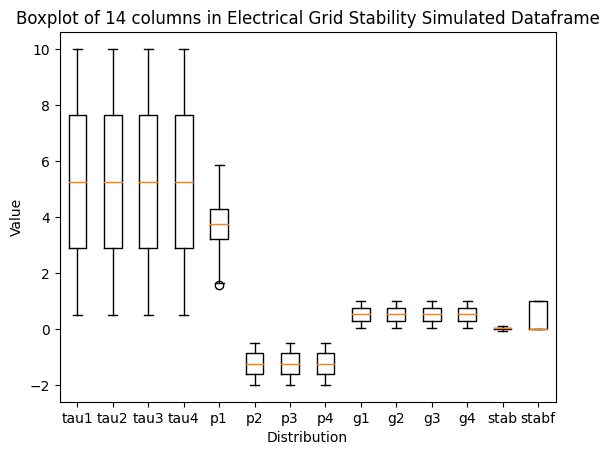

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(x=(egrid_df['tau1'], egrid_df['tau2'], egrid_df['tau3'], egrid_df['tau4'],
               egrid_df['p1'], egrid_df['p2'], egrid_df['p3'], egrid_df['p4'],
               egrid_df['g1'], egrid_df['g2'], egrid_df['g3'], egrid_df['g4'], egrid_df['stab'], egrid_df['stabf']))
# Setting x-axis labels
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab', 'stabf'])
# Setting title, xlabel, and ylabel directly on fig1
plt.title("Boxplot of 14 columns in Electrical Grid Stability Simulated Dataframe")
plt.xlabel('Distribution')
plt.ylabel('Value')
plt.show()

<H4><b>Analysis: No Outliers exist in the Electrical Grid dataset</H4>

<H4><b>STEP2.4: DATA EXPLORATION:Exploratory data analysis (EDA)</b></H4>

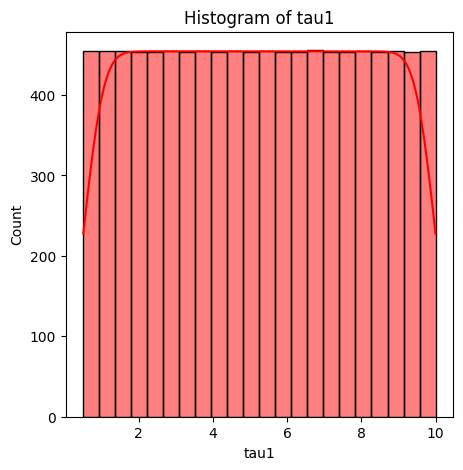

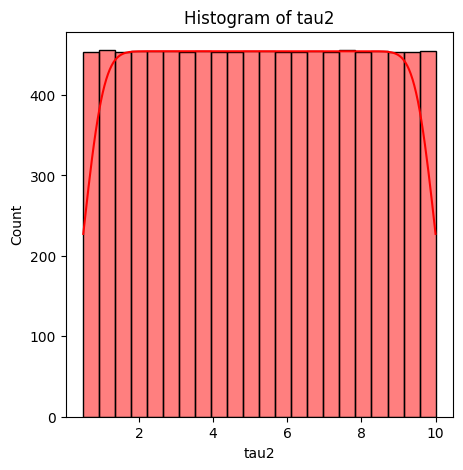

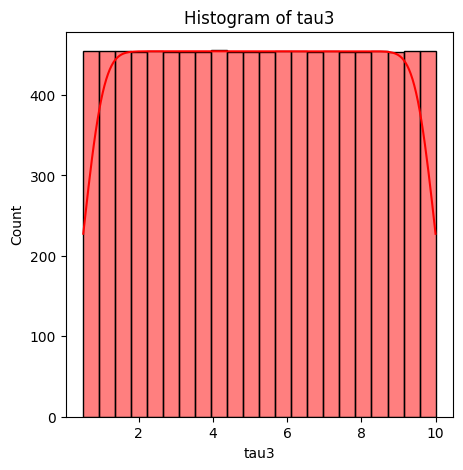

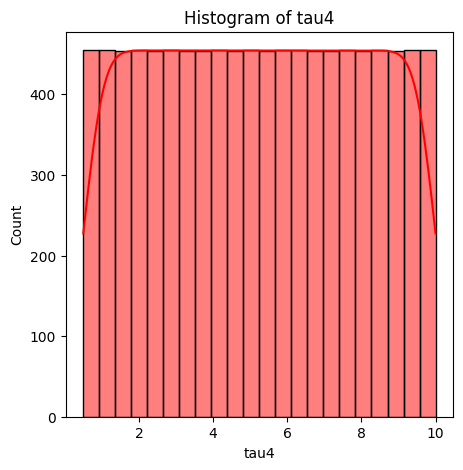

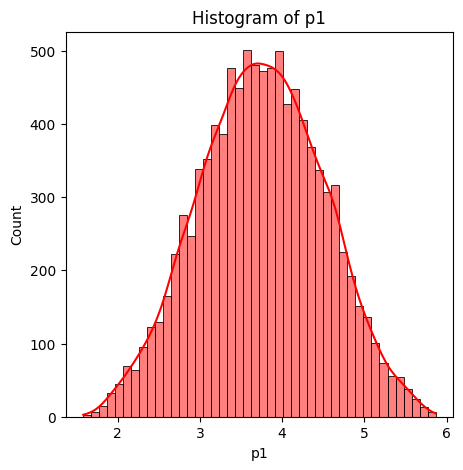

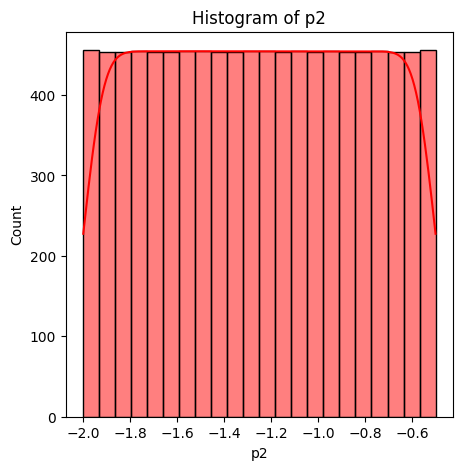

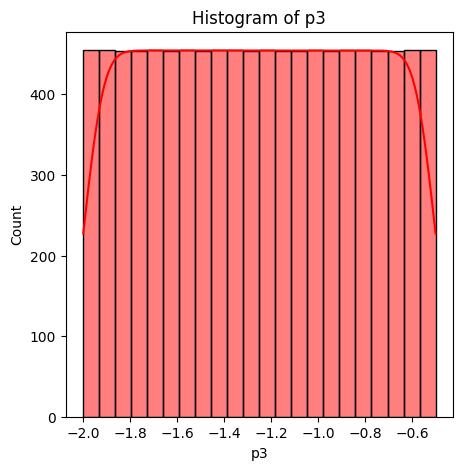

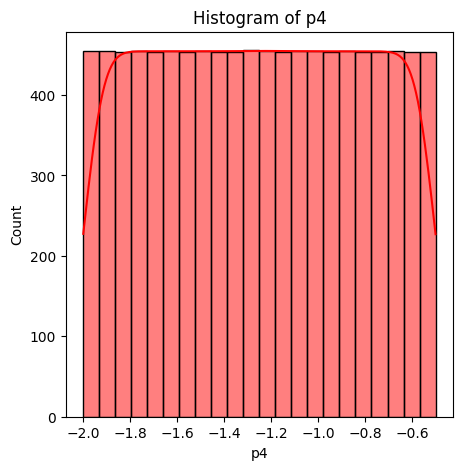

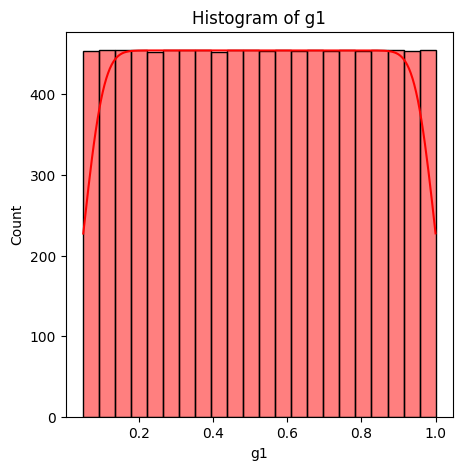

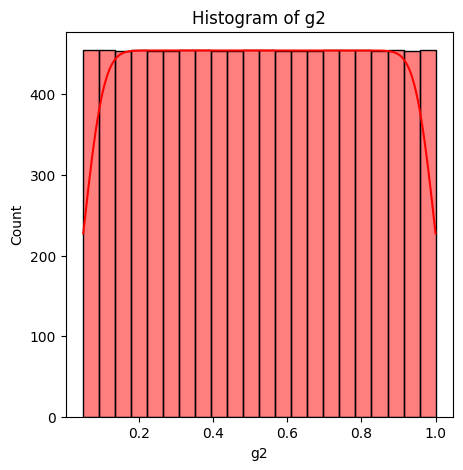

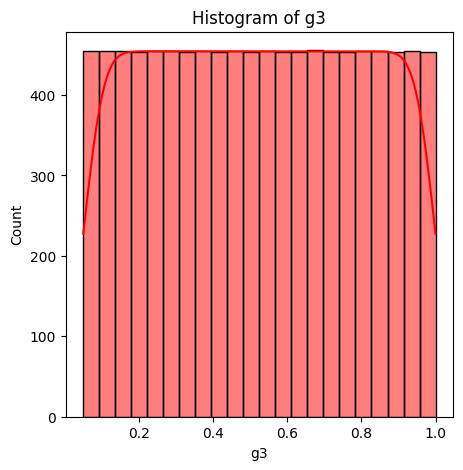

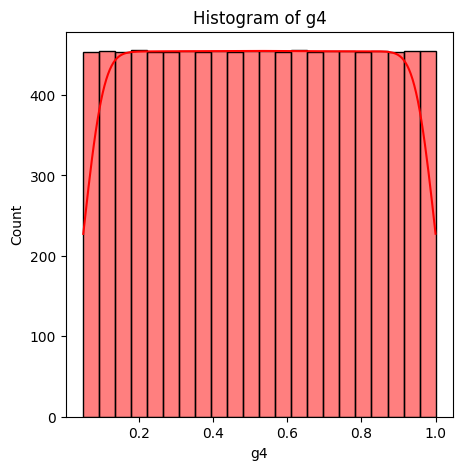

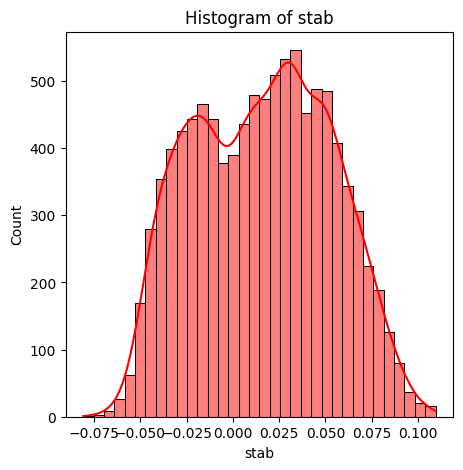

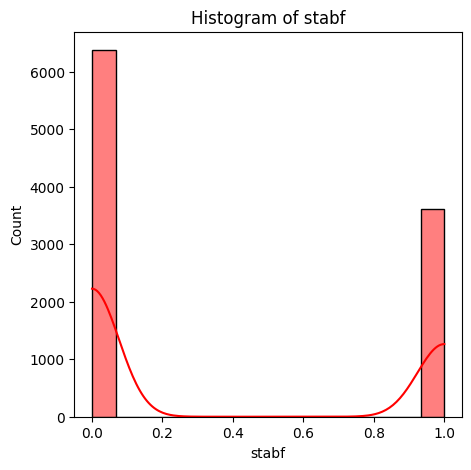

In [ ]:
#Data Exploration by plotting the histogram for each variables in the dataframe
#STEP2.4.1: Univariate Data Exploration
#the "kde" parameter of the histplot is set to true to add a curve representing the kernel density estimate of the data, calculated with the default parameters of the kde plot function.
import matplotlib.pyplot as plt
egrid_df_columns = egrid_df.columns
for col in egrid_df_columns:
    plt.figure(figsize=(5, 5))
    sb.histplot(egrid_df[col], kde = True, color='r')
    plt.title(f'Histogram of {col}')
    plt.show()
#Data Distribution of Almost All columns are Uniformly or Normaly distributed except the Label data since it is categorical data

<b>Analysis:<b><br/>
p1 data is normally distributed with bell-shapped curve<br/>
but, p2,p3 and p4 column data are Uniformly distributed <br/>
4 columns of tau(x) data are Uniformly distributed <br/>
4 columns of g(x) data are Uniformly distributed <br/>
stab column data shows a Multimodal distribution <br/>
stabf column data shows a Bimodal distribution due to categorical data stable and unstable<br/>


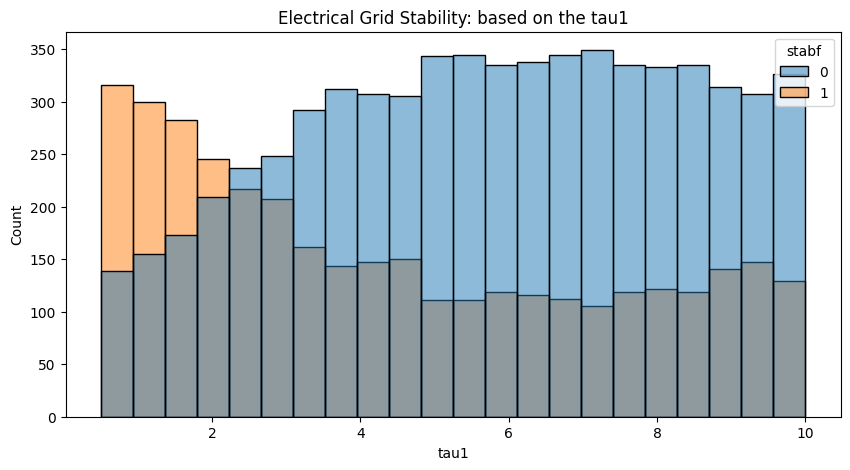

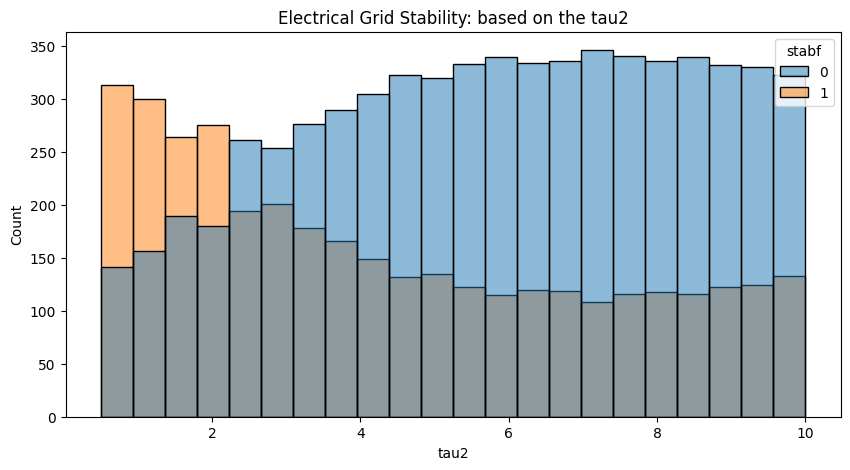

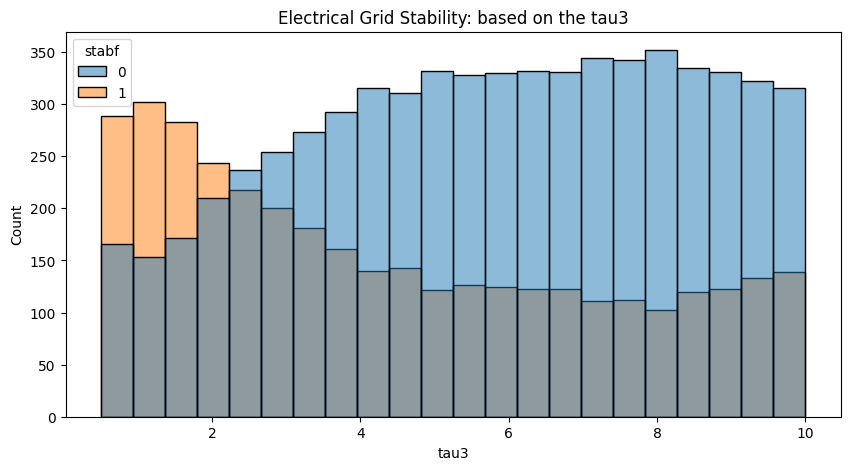

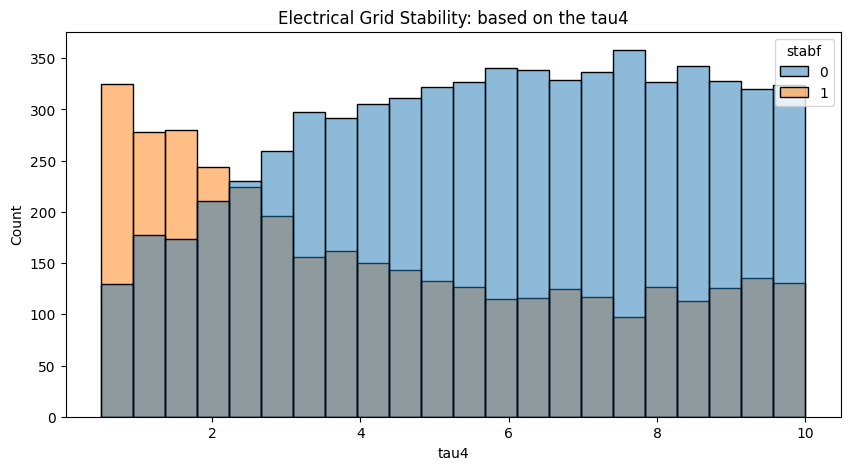

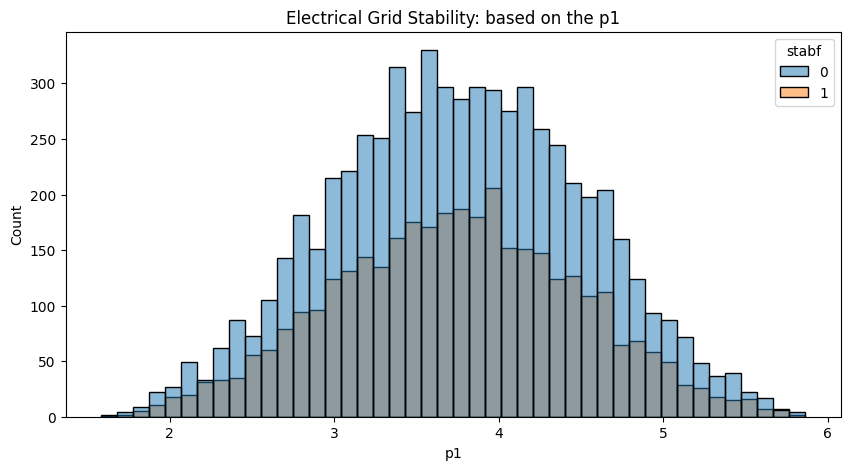

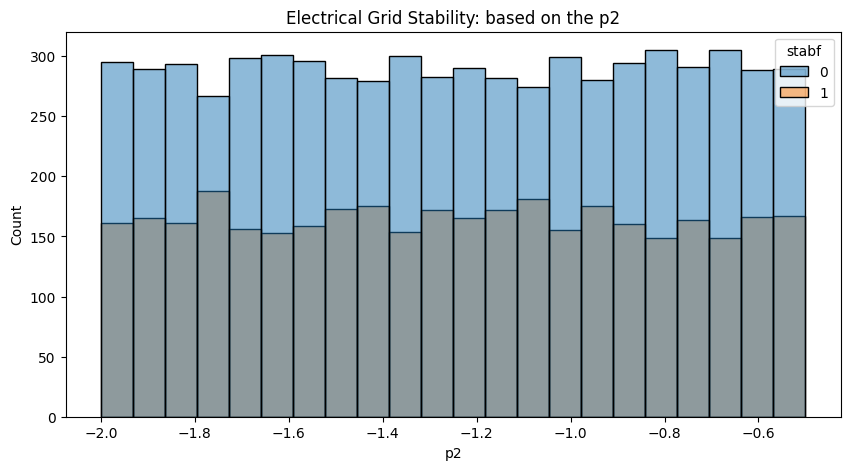

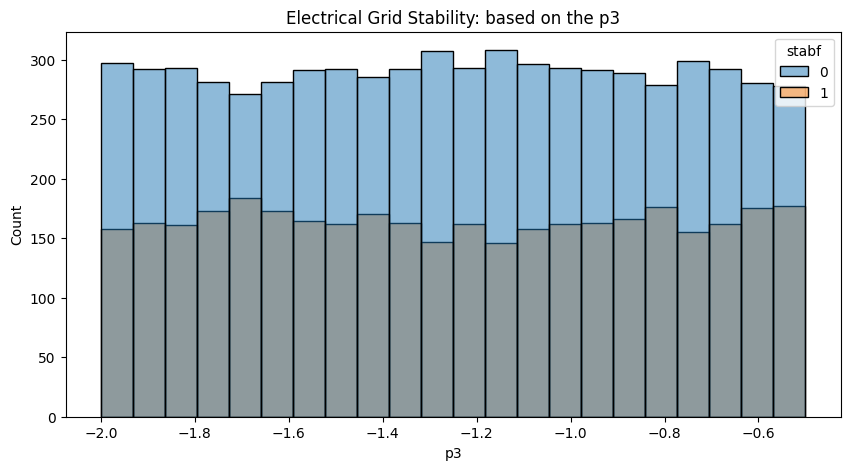

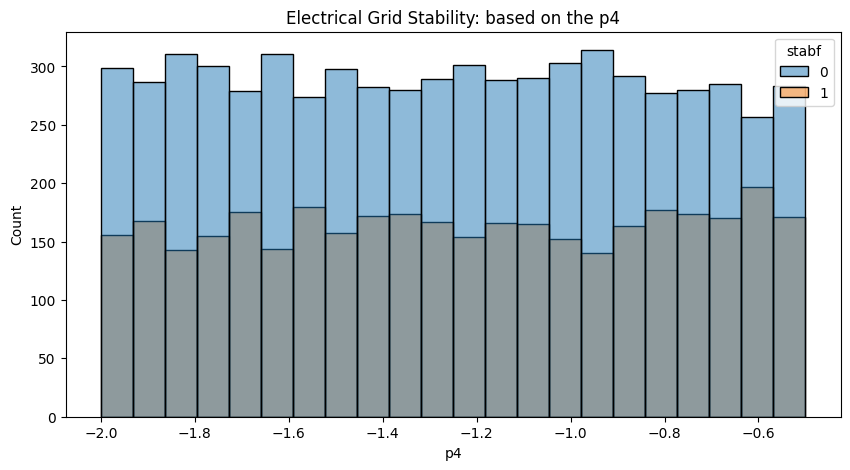

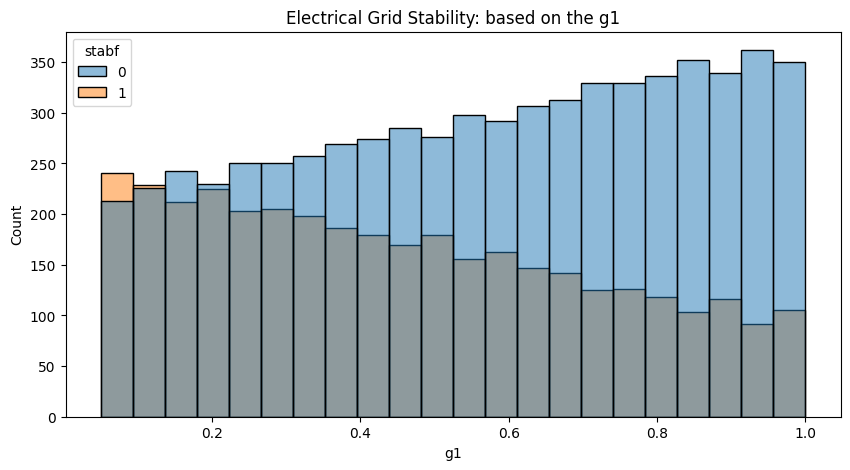

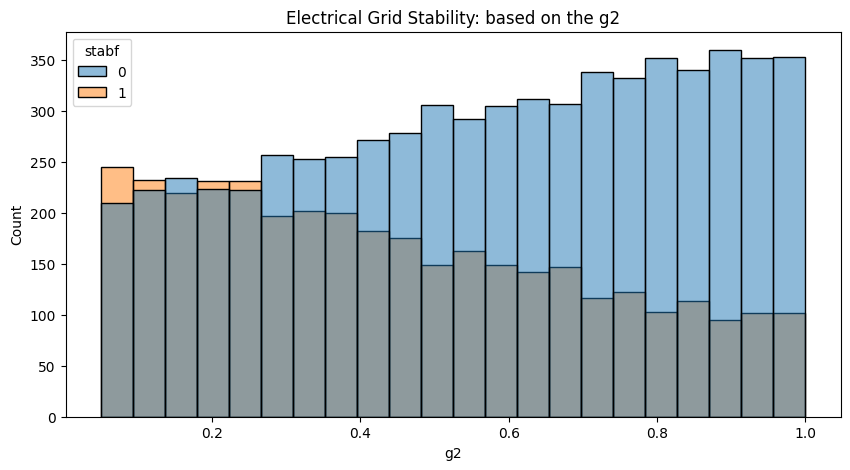

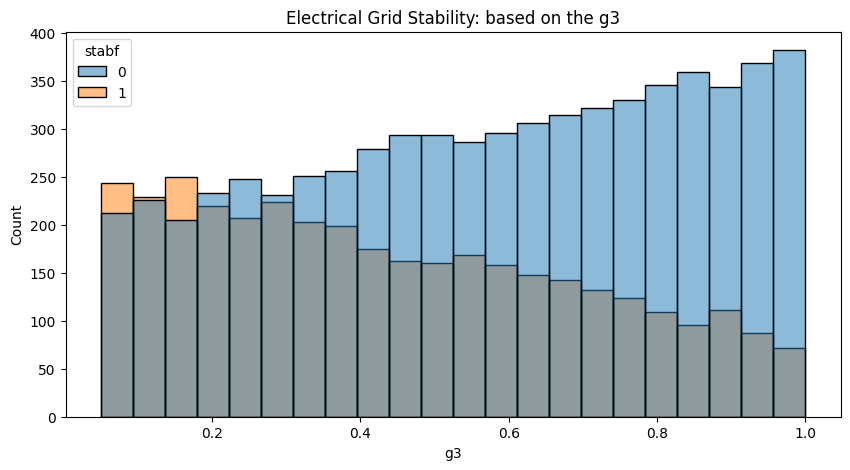

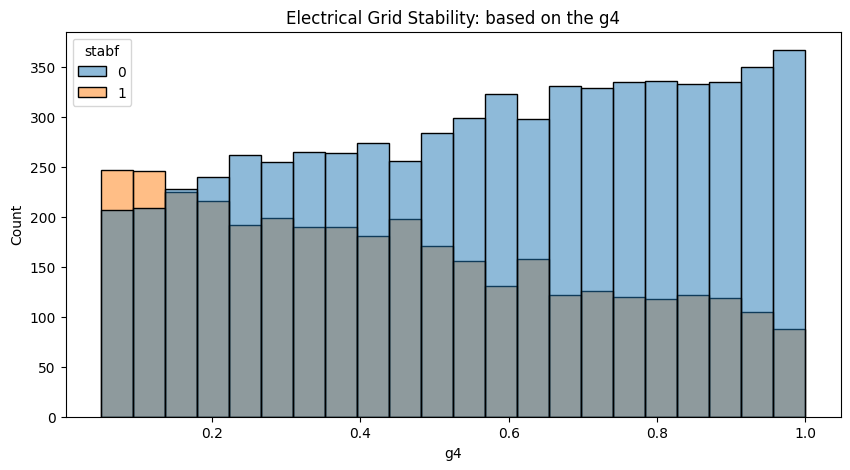

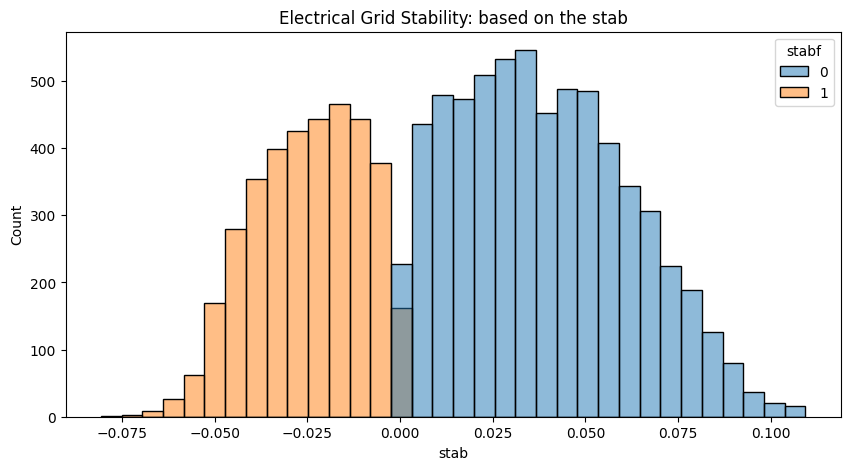

In [ ]:
#STEP2.4.2: Bivariate Data Exploration of all 13 features with the Label 'stabf' through histogram
# Exploring to uncover some important data Patterns of the Electrical Grid Stability Data dataset based on the 13 features namely:'tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4',
#'g1', 'g2', 'g3', 'g4', 'stab' to show how they impact the occupancy Ratio
features1 = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']
for i in features1:
    plt.figure(figsize=(10,5))
    plt.title("Electrical Grid Stability: based on the "+ i)
    sb.histplot(x=i, hue="stabf", data=egrid_df)
    plt.show()




 <b> Analysis:<br/>
  In tau(x), there is more stability when the tau(X) variables are around value 2<br/>
  In p1, there is hightest stability when the p1 variables are around value 4 <br/>
  In p2,p3,p4: the possibility of stability is uniform within the range of -2.0 and -0.6 <br/>
  In g(x), The stability rate is more for g(x) when value of each as specified below:<br/>
  For g1 value is between 1.8 and 2<br/>
  For g2 value is between 1.8 and 2.2<br/>
  For g3 value is between 1  and 3<br/>
  For g4 value at 1.8<br/>
  In stab, stability exist only at around +/- 0.000XX
  
  </b>

<b> <h4>Evaluating and Visualizing the Correlation Coefficients between all 14 variables of the Dataset using Scatterplot and Heatmap</h4></b>

In [ ]:
#STEP2.4.3: Evaluating the Correlation Coefficients between the Label('stabf') and 13 features of the ElectricGrid Dataset
egrid_df.corr()['stabf'].sort_values(ascending=False).round(9)

stabf    1.000000
p4       0.022912
p3       0.000649
p2      -0.006173
p1      -0.010006
g1      -0.197664
g4      -0.204774
g2      -0.217341
g3      -0.231774
tau1    -0.234898
tau3    -0.237492
tau4    -0.239375
tau2    -0.246280
stab    -0.826959
Name: stabf, dtype: float64

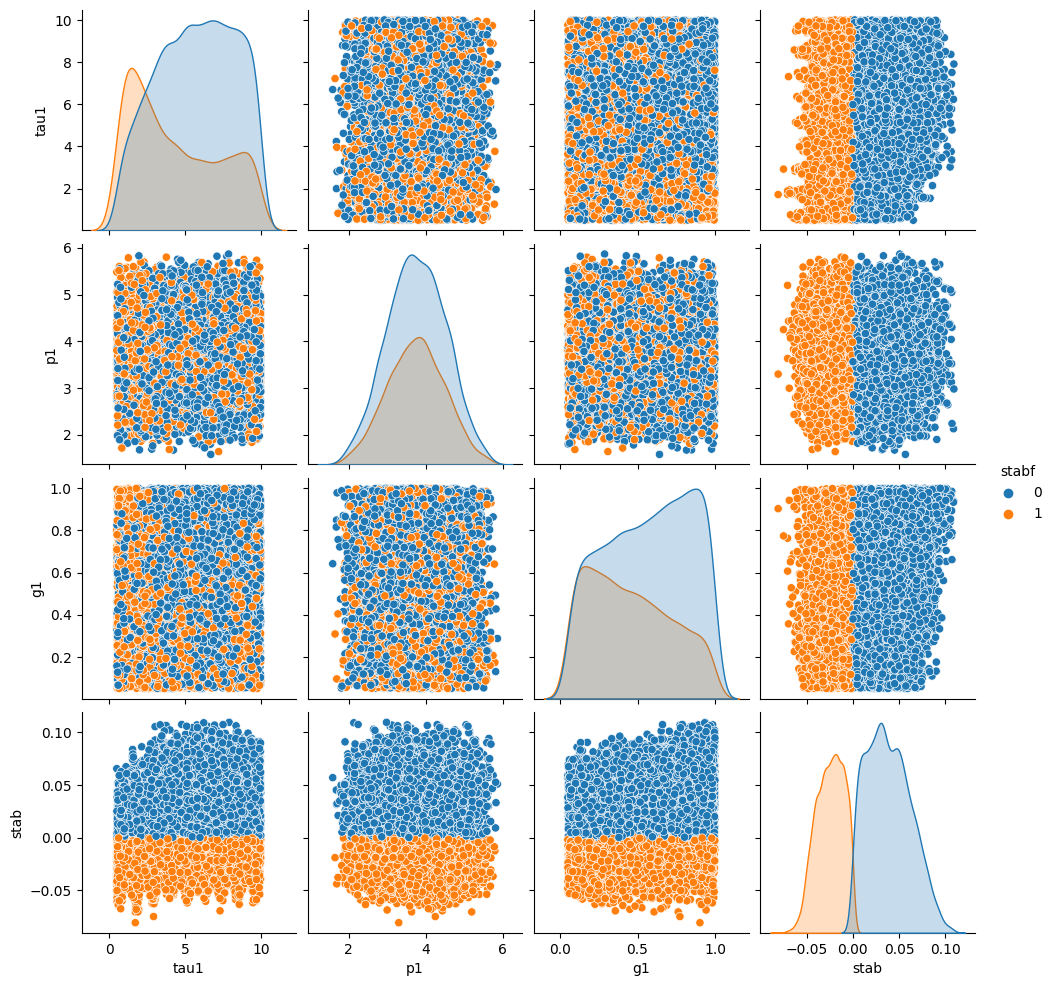

In [ ]:
#Scatteplot using Seaborn to visualiza the specific main features out of 13 features #main 4 features: tau1, p1, g1 and stab, with 'stabf' label
required_cols = ['tau1', 'p1', 'g1', 'stab','stabf']
sb.pairplot(data=egrid_df[required_cols], hue='stabf')

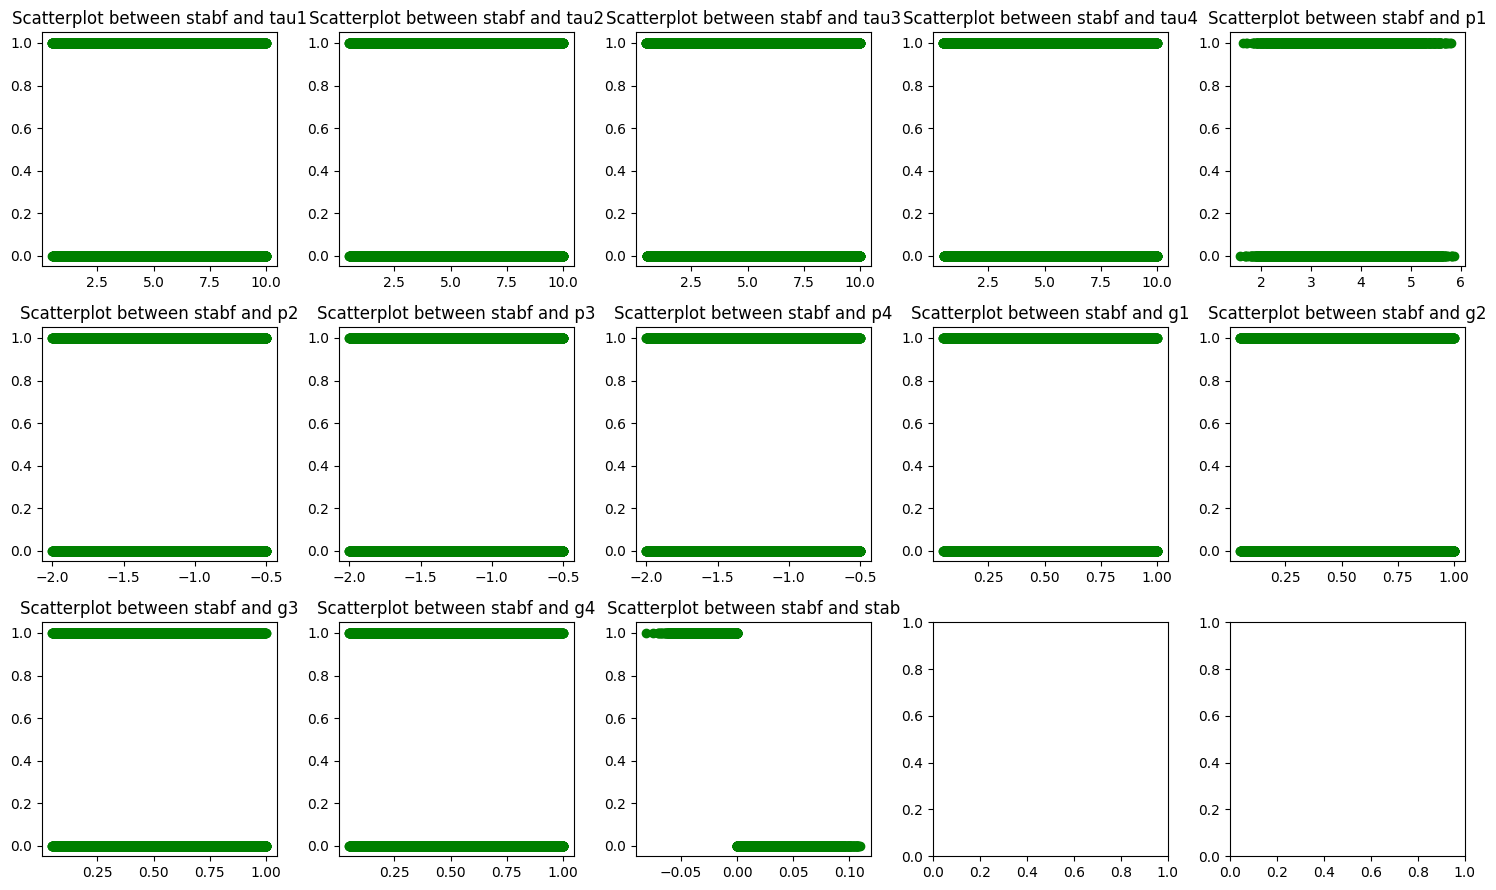

In [ ]:
#STEP2.4.4:Bivariate Data Exploration of all 13 features to explore their Correlation Coefficient trough Scatterplot
features1 = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']
# Creating a matrix of subplots for displaying the scatterplots for Bivariate Data Exploration between features and label
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))
# Flattenning the 3x5 matrix to a 1D array for indexing
axes = axes.flatten()
# Looping through features for creating the  scatterplots
for i, col in enumerate(features1):
    axes[i].scatter(egrid_df[col], egrid_df['stabf'], color='g')
    axes[i].set_title("Scatterplot between stabf and " + col)
# Adjusting the layout for better spacing
plt.tight_layout()
plt.show()

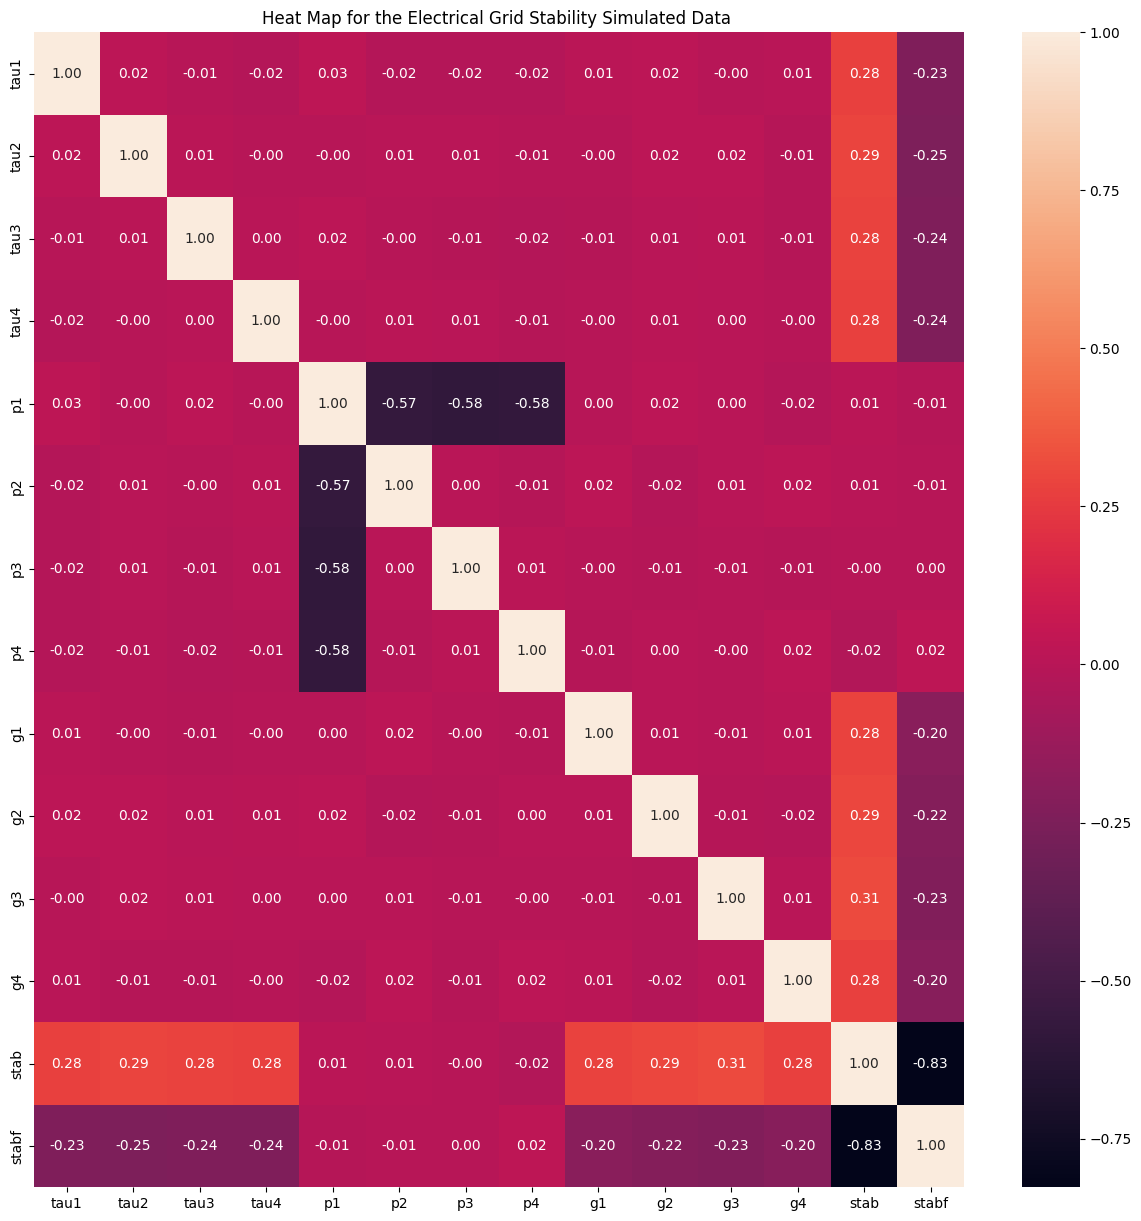

In [ ]:
#STEP2.4.5: Implementing Multivariate Data Exploration through heatmap chart for exploring Corralation Coeffients insightfully
#Generating the Heatmap chart to Visuallize the Corralation Coeffients of all 14 variables
plt.figure(figsize=(15,15))
corr_matrix = egrid_df.corr().round(4)
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Heat Map for the Electrical Grid Stability Simulated Data ")
plt.show()

<b>Analysis:<br/>
With respect to the target "stabf":<br/>
"stab": maximal real part of the characteristic equation root  is the most negatively correlated to the label "stabf" <br/>
tau(x) : The 4 time constants or time delays which reveals the reaction time of the participant is negatively correlated  to the label "stabf".<br/>
g(x): the (gamma) coefficient  proportional to price elasticity is negatively correlated to the label "stabf"<br/>
p(x): The nominal power  is very weakly correlated to the label "stabf"
<br/>
</b>


<b><H4>STEP2.5: FEATURE ENGINEERING:  Performing Feature Selection </H4>
</b>

In [ ]:
X = egrid_df.drop('stabf', axis=1)
Y = egrid_df['stabf']
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

<b><H4>Step2.6: Splitting the dataset into the Training set and the Test set</H4></b>

In [ ]:
#Step2.6: Splitting the dataset into the Training set and the Test set using the train_test_split() method of sklearn.model_selection python package
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<Axes: xlabel='stabf', ylabel='count'>

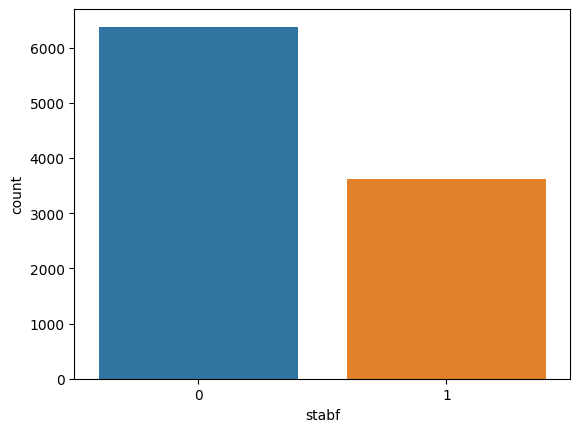

In [ ]:
#Below countplot is used to visually prove that the Target Class imbalance exist in the Electrical Grid dataset!
#Around 6000 records are unstable class and around 4000 records are stable class
sb.countplot(egrid_df, x ="stabf")

**Random undersampling perfomed to address the Class imbalance in the Target Label. Random Under sampling** involves randomly selecting examples from the majority class and deleting them from the training dataset. In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached

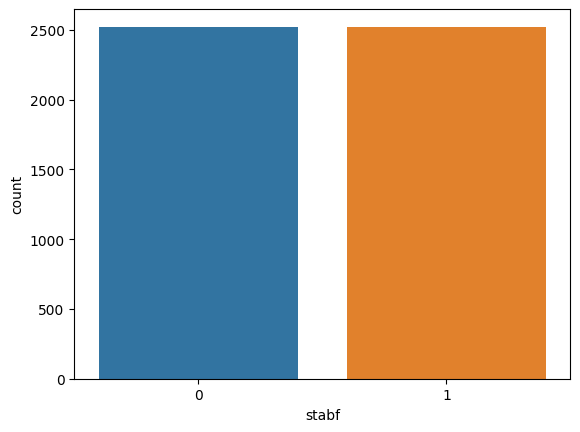

In [ ]:
#RandomUnderSampler class of imblearn.under_sampling python package is used to perform the randome under sampling, which will
#Under-sample the majority class(es) by randomly picking samples with or without replacement. Thus, equalize the count of occurances of both classes w.r.to minority one
from imblearn.under_sampling import RandomUnderSampler

eg_resampler = RandomUnderSampler(random_state=0)
#Fitting the RandomUnderSampler instance to the training data
X_train_undersampled, y_train_undersampled = eg_resampler.fit_resample(X_train, y_train)
sb.countplot(x =y_train_undersampled)
y_train = y_train_undersampled


<b><H4>Step2.7: Scaling the features using the MinMaxScaler </H4></b>

In [ ]:
#Step2.7: Scaling the features using the MinMaxScaler class of sklearn.preprocessing python packa ge to get non negative value for further processing
##c) Scaling features for Standardization using MinMaxScaler is for getting non negative value for selectKbest  for feature Engineering
from sklearn.preprocessing import MinMaxScaler
minmaxsc  = MinMaxScaler()
#Fitting the MinMaxscaler instance to the training undersampled data
X_train_s = minmaxsc.fit_transform(X_train_undersampled)
#Then, Scaling the Test data using the fitted MinMaxscaler instance
X_test_s = minmaxsc.transform(X_test)

<b><h4>TaskA.1 : Experimented by training Models using K-Nearest Neighbors(KNN) classifier-model
<br/><br/>
Two experiments implemented using K-Nearest Neighbors(KNN) classifier-modelPartA and PartB:<br/>
Part-A Objective: Finding the best K value and Training the  KNN model with 13 features and Evaluating
<br/> <br/>
Part-B Objective: Improve Accuracy and reduce False Positive count by fine tuning the Part-A model by performing Grid search on the reduced number of features selected using Filter based Feature Selection(SelectKBest) and  Evaluating and validating the Same

</h4></b>

<b>Below is Part-A <br/>
Part-A Objective: Finding the best K value and Training the KNN model with 13 features & Evaluating the Same</b>

In [ ]:
#STEPA.1: Finding the Best K value using the cross_val_score() method of sklearn.model_selection package
#sklearn.neighbors Package used for importing KNeighborsClassifier supervised Machine learning algorithm/Mpdel
from sklearn.neighbors import KNeighborsClassifier
#cross_val_score method of sklearn.model_selection is imported to perform the cross validation on specific n_neighbors value for specific data folds
from sklearn.model_selection import cross_val_score

# Trying to find best n_neighbors value between range of 3 to 15
knn_Kvalues = range (3,15)
train_scores = []
test_scores = []
for k in knn_Kvalues:
    knn_model_test = KNeighborsClassifier(n_neighbors=k,p= 1, weights= 'distance',metric='minkowski')
    #cv = k-fold cross-validation, here, cv i.e., cross-validation is set to 5 means the dataset is grouped into 5 folds
    score = cross_val_score(knn_model_test, X_train_s, y_train, cv=5)
    test_score = cross_val_score(knn_model_test, X_test_s, y_test, cv=5)
    #Appending the training and the test scores of all K possibilities for plotting purpose
    train_scores.append(np.mean(score))
    test_scores.append(np.mean(test_score))
    print("when k={}, Train_Score={} and Test_Score={}".format(k,np.mean(score),np.mean(test_score)))


when k=3, Train_Score=0.911377562257146 and Test_Score=0.9013333333333333
when k=4, Train_Score=0.9113763823996729 and Test_Score=0.9036666666666667
when k=5, Train_Score=0.9242647521512735 and Test_Score=0.9153333333333334
when k=6, Train_Score=0.9286247188006355 and Test_Score=0.9213333333333333
when k=7, Train_Score=0.9319981279594758 and Test_Score=0.9276666666666668
when k=8, Train_Score=0.9355662136013969 and Test_Score=0.9303333333333332
when k=9, Train_Score=0.9383430081646138 and Test_Score=0.933
when k=10, Train_Score=0.9413160523542089 and Test_Score=0.9323333333333335
when k=11, Train_Score=0.9403247754337943 and Test_Score=0.9359999999999999
when k=12, Train_Score=0.9430996035678889 and Test_Score=0.9359999999999999
when k=13, Train_Score=0.9436958248776881 and Test_Score=0.9390000000000001
when k=14, Train_Score=0.9484528135667878 and Test_Score=0.9389999999999998


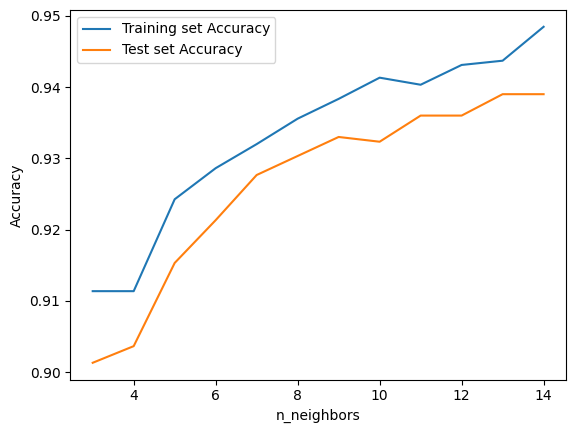

In [ ]:
#STEPA.2: Plotting the Training and Test Accuracy scores obtained with different "n_neighbors" values ranging from 3 to 15
plt.plot(knn_Kvalues, train_scores, label="Training set Accuracy")
plt.plot(knn_Kvalues, test_scores, label="Test set Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

<b>Its is very visible from the above plot that both Test Accuracy Score and the Training accuracy are significantly nearer first when "n_neighbors" value is 11 of around 94%, which could be considered as best "n_neighbors" value to proceed for Training the KNN model with 13 features</b>

In [ ]:
#STEPA.3: Training the KNN model with n_neighbors=11 on the Electric Grid Dataset having 13 features
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors is set to the found value 11, metric parameter is  set to 'minkowski' and
#value of p determines type of  distance metric. Here  p = 2 corresponds to the Euclidean distance (L2 norm)
knn_model1 = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2 )
knn_model1.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#STEPA.4: Predicting the KNN Model on Test Electric Grid Dataset using predict() method of the model's instance on the test dataset
y_pred_knn_model1 = knn_model1.predict(X_test_s)

In [ ]:
#STEPA.5: Evaluating the Prediction performance of the trained KNN Model by computing the accuracy score, Confusion matrix and classification_report
#This is done by comparing & evaluating on the Test Label with Predicted Label using accuracy_score(), confusion_matrix() and classification_report() functions of metrics class
from sklearn import metrics
#STEP3.5.1: Printing the Accuracy
print("Accuracy of the KNN Model with 13 features: ", str((metrics.accuracy_score(y_test,y_pred_knn_model1) * 100).round(2)),"%")
#STEP3.5.2: Printing the Confusion Matrix
cm1_knn = metrics.confusion_matrix(y_test,y_pred_knn_model1)
print(cm1_knn)
#STEP3.5.3: Printing the Classification Report
class_rep1 = metrics.classification_report(y_test,y_pred_knn_model1)
print(class_rep1)

Accuracy of the KNN Model with 13 features:  91.73 %
[[1720  182]
 [  66 1032]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1902
           1       0.85      0.94      0.89      1098

    accuracy                           0.92      3000
   macro avg       0.91      0.92      0.91      3000
weighted avg       0.92      0.92      0.92      3000



<b>Accuracy of the KNN Model with 13 features:  92 %</b>

In [ ]:
#STEPA.5.4: Printing the Individual values of True positive, True Negative, False Positive, false negative from the Confusion matrix
tn, fp, fn, tp = cm1_knn.ravel()
print("True Positive:The model identified ", tp ,"records as Truly Stable. ")
print("True Negative: The model identified ", tn ,"records as Truly Unstable. ")
print("False Positive: ", fp ,"are instances where the model predicted the positive class (stable) incorrectly. ")
print("False Negative: ", fn ," These are instances where the model predicted the negative class (unstable) incorrectly. ")

True Positive:The model identified  1032 records as Truly Stable. 
True Negative: The model identified  1720 records as Truly Unstable. 
False Positive:  182 are instances where the model predicted the positive class (stable) incorrectly. 
False Negative:  66  These are instances where the model predicted the negative class (unstable) incorrectly. 


<b>Though, the Accuracy is significantly high value of 92%, however the count of False Positive: 182 which is ethically high out of 3000 instances of test data in the perspective of ethical considerations for the Electrical grid stability  </b>

In [ ]:
#STEPA.5.5:: Computing and Ploting the ROC curve along with the calculated AUC that to display the AUROC Curve
#AUROC-Area Under Receiver Operating Charecteristic Curve. Ref.: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#roc_curve &  auc  methods of sklearn.metrics are used to find AUC and ROC Values. Plotting the same on AUROC graph
from sklearn.metrics import roc_curve, auc

# Selecting only the predicted probability of the positive class(1)
y_prob_knn = knn_model1.predict_proba(X_test_s)[5, 5]

#Computing the ROC Curve and its AUC
fpr, tpr, thresholds = roc_curve(y_test,y_prob_knn)
roc_auc = auc(fpr, tpr)
#Plotting ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Model with 13 features on Electrical Grid dataset')
plt.legend(loc="lower right")
plt.show()

NameError: ignored


<b>Though the AUROC score is 98%, significantly high with remarkably high Accuracy score of 92%. However, in the perspective of the Ethical consideration of Electrical Grid stability, the false positive count is 182 out of 3000 instances of test data seems to be high. The false negative is 66, though its reasonable. Still space to improve.

Because, the increase in the Precision score,Type I error (False positive) would cause higher threat when the unstable connectivity wrongly predicted and served as stable connectivity to an Industry,
which leads to customer Churn and harmful to their business. Because, when an unstable(unbalanced voltage)
electrical connectivity (wrongly prediting as stable) given to industries would lead to higher losses due to machinaries downtime, higher temperature rise of the machinaries, reduction in efficiency and a reduction in developed torque(measure of the force that can cause an object to rotate about an axis).

On the other hand, the increase in Recall score will cause Production loss
when a stable current(false negative, Recall) wrongly predicted as unstable and not servimg to required customer is a
production loss to the Electrical Grid company.
<br/>

Therefore, proceeding to Part-B aiming to reduce the count of false positve and Fasle Negativeper by performing another KNN model training  by reducing the features using SelectKBest featureselection method and doing cross validation with diffrent combinations of Hyperparameters using the GridSearchCV class and evaluating the same.</b>


<h3><b>PART B:</b><br/>
<b>Objective: To improve Accuracy and reduce False Positive count by fine tuning the model by performing Grid search on the reduced number of features selected using Filter based Feature Selection(SelectKBest) and Evaluating and validating the Same
     </b>
    </h3>
   

In [ ]:
#StepB.1: Implementing the Filter based Feature Selection using the SelectKBest class and f_classif  function since all features are numeric
from sklearn.feature_selection import SelectKBest, f_classif
# Use SelectKBest with the chi-squared test for feature selection
k_best_selector = SelectKBest(f_classif, k=4)
X_train_kbest = k_best_selector.fit_transform(X_train_s, y_train)
X_test_kbest = k_best_selector.transform(X_test_s)

In [ ]:
#Viewing the X_train_kbest to verify the number of columns selected
X_train_kbest[:10]

array([[0.83398683, 0.72985116, 0.26940578, 0.57342625],
       [0.84986976, 0.82586496, 0.33499714, 0.59883387],
       [0.64117172, 0.8831926 , 0.02837412, 0.57873334],
       [0.33232417, 0.79205693, 0.07695001, 0.50309953],
       [0.29134259, 0.70738146, 0.41524782, 0.57888856],
       [0.42884072, 0.30845962, 0.25093393, 0.4374353 ],
       [0.22998661, 0.83148629, 0.50222269, 0.45091122],
       [0.46788291, 0.51546628, 0.4010767 , 0.4900564 ],
       [0.13753374, 0.36018111, 0.78949144, 0.5751476 ],
       [0.16965741, 0.29040094, 0.98764252, 0.56255167]])

In [ ]:
#Verifying which 4 features are selected amoung the 13 features are selected. The columns selected by applying KbestSelector could be found
#by setting the indices parameter totrue in the get_support() function
k_best_selector.get_support(indices=True)

array([ 1,  2, 10, 12])


The <b>array([ 1,  2, 10, 12]) are the features such as tau2,tau3,g3,stabf  </b>

<b><h4>STEPB.2: Training the second KNN model(using KNeighborsClassifier class) through Grid Search(using the GridSearchCV class) in order to feed different set of Hyper parameters so as to build & evaluate a Best KNN Model suitable to predict stability for Electrical Dataset with 4 features </h4>
</b>

In [ ]:
#Importing the Required packages for KNN Model and to perform Grid Search cross validation from the 'sklearn' python package to find the Best KNN Model
#by Fitting model instance to the training dataset with different set of Hyper parameters
#Importing the KNeighborsClassifier and GridSearchCV Class
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection Package used for GridSearchCV to implement “fit” and “score” methods. Also implements “score_samples”, “predict”
from sklearn.model_selection import GridSearchCV


# Creating a KNN classifier object instance
knn_model = KNeighborsClassifier()

#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Defined 3 hyper parameters with viable values for grid search. Having specific range of n_neighbors, weight and p values to peform GridSearch with 'minkowski' metric
params_grid = {
    'n_neighbors': [7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['minkowski'],
    }

#Performing the grid search with a cross-validation of 5 data folds (cv=5) and specified 'accuracy' as the required scoring parameter
grid_search_knn = GridSearchCV(knn_model, params_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_kbest, y_train)
#Printing the Parameters of the Best KNN Model
print("Best Parameters of the KNN Model for Electric Grid Dataset: ", grid_search_knn.best_params_)

Best Parameters of the KNN Model for Electric Grid Dataset:  {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


<b><h4>STEPB.3: Predicting the best KNN model on the Test dataset of Electrical Dataset</h4></b>

In [ ]:
#StepB.3: Predicting the best model on the test dataset having 4 features
best_model_knn = grid_search_knn.best_estimator_
y_pred = best_model_knn.predict(X_test_kbest)

<b><H4>Step B.4: Evaluating the Best KNN Model's Performance</H4></b>

In [ ]:
#StepB.4: Evaluating the Predictions performance of the trained Best KNN Model by computing the accuracy score, Confusion matrix and classification_report
#This is done by comparing & evaluating on the Test Label with Predicted Label using accuracy_score(), confusion_matrix() and classification_report() functions of metrics class
##StepB.4.1: Calculating the Accuracy of the Best KNN Model
from sklearn import metrics
knnBest_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the KNN Model with 4 features: ", str((knnBest_Accuracy * 100).round(2)),"%")


##StepB.4.2: Calculating the cross-validation scores for the Best KNN Model
#This array containing the mean test score for each combination of hyperparameters given in the grid search
knn_cross_val_scores = grid_search_knn.cv_results_['mean_test_score']
print("Cross-validation scores:", knn_cross_val_scores)

Accuracy of the KNN Model with 4 features:  97.0 %
Cross-validation scores: [0.97264127 0.9730377  0.96510807 0.96788349 0.97204623 0.97343453
 0.96510729 0.96788271 0.97283948 0.97561549 0.96510631 0.96966665
 0.97204583 0.97521847 0.9651067  0.9690722  0.96966744 0.9744258
 0.96689084 0.97006289]



<b>The Accuracy is 97% is the significantly hishest score by Grid Search applied on KNN model for the Electrical Grid dataset. Also, the cross validation mean test scores of Grid search model's different hyperparameters are significantly higher than the Accuracy of previous KNN model.</b>

In [ ]:
##StepB.4.3: Calculating the Confusion matrix for the Best KNN model
confusion_matrix_knn_best = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_knn_best)

Confusion Matrix:
[[1830   72]
 [  18 1080]]


In [ ]:
# Printing the Individual values of True positive, True Negative, False Positive, false negative from the Confusion matrix
tn, fp, fn, tp = confusion_matrix_knn_best.ravel()
print("True Positive:The model identified ", tp ,"records as Truly Stable. ")
print("True Negative: The model identified ", tn ,"records as Truly Unstable. ")
print("False Positive: ", fp ,"are instances where the model predicted the positive class (stable) incorrectly. ")
print("False Negative: ", fn ," These are instances where the model predicted the negative class (unstable) incorrectly. ")

True Positive:The model identified  1080 records as Truly Stable. 
True Negative: The model identified  1830 records as Truly Unstable. 
False Positive:  72 are instances where the model predicted the positive class (stable) incorrectly. 
False Negative:  18  These are instances where the model predicted the negative class (unstable) incorrectly. 



Confusion Matrix Data Interpretation: <br/>
<b>True Positive (TP): 1080</b><br/>
These are instances where the model correctly predicted the positive class (stable). The model identified 1080 records as truly stable.
<br/>
<b>True Negative (TN): 1830 </b><br/>
These are instances where the model correctly predicted the negative class (unstable in your case). The model identified 1830 records as truly unstable.
<br/>
<b>False Positive (FP): 72 </b><br/>
These are instances where the model predicted the positive class (stable) incorrectly. The model misclassified 72 relatively better than previous KNN model as it reduced from 182 to 72<br/>

<b>False Negative (FN):  18</b><br/>
These are instances where the model predicted the negative class (unstable) incorrectly. The model missed 18 records that were actually stable but predicted them as unstable. Shows an improved count, reduced from 66 to 18<br/>









In [ ]:
##StepB.4.4: Printing Classification Report for the Best KNN Model
result = metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1902
           1       0.94      0.98      0.96      1098

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



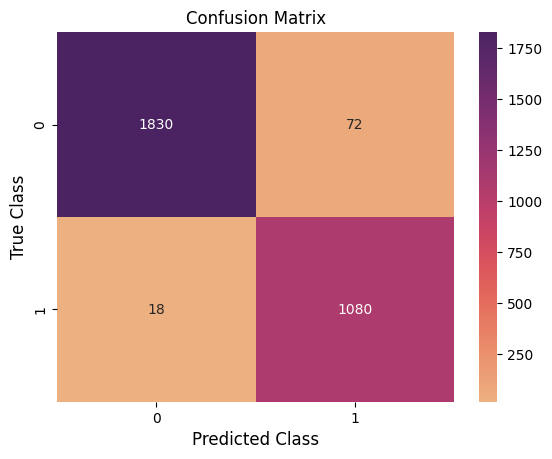

In [ ]:
ax = sb.heatmap(confusion_matrix_knn_best, cmap="flare", annot=True, fmt="d")
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

<b><H4>StepB.5:Computing and Visualizing AUROC-Area Under Receiver Operating Charecteristic Curve</H4></b>

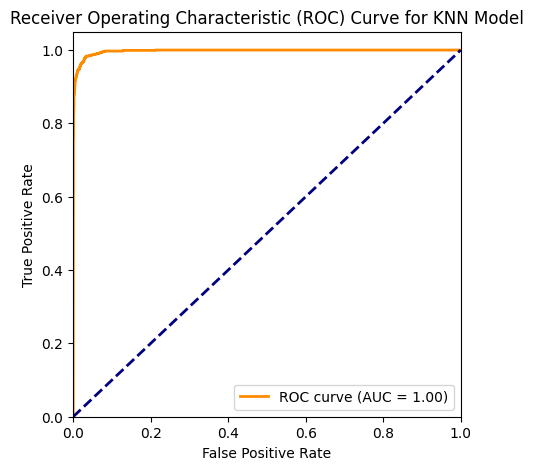

In [ ]:
#Step B.5: Computing and Ploting the ROC curve along with the calculated AUC that to display the AUROC Curve
#AUROC-Area Under Receiver Operating Charecteristic Curve. Ref.:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#roc_curve &  auc  methods of sklearn.metrics are used to find AUC and ROC Values and plotting the same on AUROC graph
from sklearn.metrics import roc_curve, auc

# Selecting only the predicted probability of the positive class(1)
y_prob = best_model_knn.predict_proba(X_test_kbest)[:, 1]
#Computing the ROC Curve and its AUC
fpr, tpr, thresholds = roc_curve(y_test,y_prob)#y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()

<p align='justify'><b>Above plot shows the highest AUC score of 1.00 which is 100%. Which relatively highest AUC score<br/>
<h3>Analysis and Conclusion on TASK-A.1</h3>The Best KNN model proved a better false positve count of 72 (decreased from 182 to 72) than the former one beside having remarkably higher Accuracy of 97% than the previous KNN model. Moreover, it holds the highest AUC score of 1.00. Favourably, the false negative count have also been reduced drastically from 66 to 18 that shows the improved evaluation and suggests a better performance than the formeron.
Therefore, the Best KNN model trained using gridsearch seems to be a better Model than the previous one for predicting the stability of the Electrical Dataset.</b></p>

In [ ]:
#TESTING THE PREDICTION PERFORMANCE OF best_model_knn MODEL USING RAW DATAS IN THE FEATURES ORDER OF array([ 1,  2, 10, 12]) is tau2,tau3,g3,stabf
raw_data1 = np.array([[7.669599644,4.486640831,0.929380523,0.028870543]])   #0 row4
raw_data2 = np.array([[4.902524112,3.047540728,0.562139051,-0.005957464]])  #1 row2
raw_data3= np.array([[1.309890049,6.841211105,0.904757737,0.030604137]])   #0 row9648

from sklearn.preprocessing import MinMaxScaler
minmaxsc  = MinMaxScaler()
# X_train_s = minmaxsc.fit_transform(X_train_undersampled)
# X_test_s = minmaxsc.fit_transform(X_test)

#Fitting the scaler to the training data TO inherit the same scaling characteristics to this scaler instance
minmaxsc.fit(X_train_kbest)

#Scaling the raw data using the fitted scaler
scaled_data1 = minmaxsc.transform(raw_data1)
scaled_data2 = minmaxsc.transform(raw_data2)
scaled_data3 = minmaxsc.transform(raw_data3)
# Loading the raw data to the trained KNN model
#best_model_knn = best_model_knn()
print(scaled_data1 )
print(scaled_data2 )
print(scaled_data3 )
# Making the  predictions on the scaled data
prediction1 = best_model_knn.predict(scaled_data1)
prediction2 = best_model_knn.predict(scaled_data2)
prediction3 = best_model_knn.predict(scaled_data3)

print("Prediction1:", prediction1)
print("Prediction2:", prediction2)
print("Prediction3:", prediction3)

[[7.66959964 4.48664083 0.92938052 0.02887054]]
[[ 4.90252411  3.04754073  0.56213905 -0.00595746]]
[[1.30989005 6.84121111 0.90475774 0.03060414]]
Prediction1: [0]
Prediction2: [1]
Prediction3: [0]


<B> PRECISELY PREDICTED ALL THREE RAW-DATA INSTANCES </B>